# Import Libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import tensorflow as tf
from tensorflow.keras import  models,layers
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
BATCH_SIZE =20
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 8
Random_state = 160204046

# Load Data

In [41]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/Assignment01/firmware.csv')
data.head(5)

,filename,class,target,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel986,pixel987,pixel988,pixel989,pixel990,pixel991,pixel992,pixel993,pixel994,pixel995,pixel996,pixel997,pixel998,pixel999,pixel1000,pixel1001,pixel1002,pixel1003,pixel1004,pixel1005,pixel1006,pixel1007,pixel1008,pixel1009,pixel1010,pixel1011,pixel1012,pixel1013,pixel1014,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024,Unnamed: 1027
0,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,238,51,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,NaN
1,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,34,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,68,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,34,0,0,0,NaN
2,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,238,51,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,NaN
3,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,34,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,68,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,34,0,0,0,NaN
4,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,34,0,0,0,0,0,0,0,0,0,0,0,NaN


In [43]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Datasets/Assignment01/imagery/hackware/x86__64__lsb__unix-system-v__clang-3.8.0__O0__no-obf__unstripped__pnscan-1.0__pnscan.jpg')
img.shape

(32, 32, 3)

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Datasets/Assignment01/imagery",
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size =(IMAGE_SIZE,IMAGE_SIZE)

)

Found 4482 files belonging to 4 classes.


In [7]:
class_names = dataset.class_names
class_names

['benignware', 'gray', 'hackware', 'malware']

(20, 256, 256, 3)
[0 0 3 0 1 3 0 0 0 1 0 3 3 0 0 0 1 2 0 0]


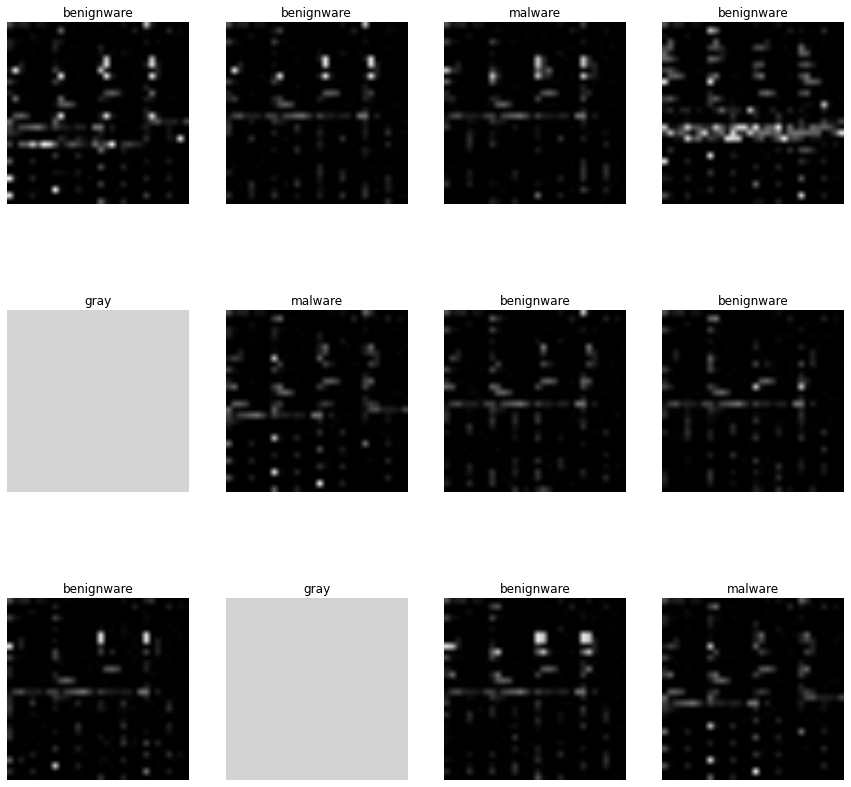

In [8]:
plt.figure(figsize=(15,15))
for image_batch , labels_batch in dataset.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")

In [9]:
#80% ==> Training
#20% ==> test
  #10% ==> validation
  #10% ==> Test

In [10]:
def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1,test_splt=0.1,shuffle=True,shuffle_size=2000 ):
  assert (train_split+test_splt+val_split) == 1
  ds_size = len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=46)

  train_size= int(train_split*ds_size)
  val_size=int(val_split*ds_size)
  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds,test_ds

In [11]:
train_ds, val_ds,test_ds = get_dataset_partitions_tf(dataset)
len(train_ds)
len(val_ds)
len(test_ds)

23

In [12]:
train_ds = train_ds.cache().shuffle(2000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(2000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(2000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
for image_batch,labels_batch in dataset.take(1):
  print(image_batch[0].numpy()/255) 

[[[0.30980393 0.30980393 0.30980393]
  [0.30980393 0.30980393 0.30980393]
  [0.30980393 0.30980393 0.30980393]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.30980393 0.30980393 0.30980393]
  [0.30980393 0.30980393 0.30980393]
  [0.30980393 0.30980393 0.30980393]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.30980393 0.30980393 0.30980393]
  [0.30980393 0.30980393 0.30980393]
  [0.30980393 0.30980393 0.30980393]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.05882353 0.05882353 0.05882353]
  [0.05882353 0.05882353 0.05882353]
  [0.05882353 0.05882353 0.05882353]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.05882353 0.05882353 0.05882353]
  [0.05882353 0.05882353 0.05882353]


In [14]:
resize_and_rescale = tf.keras.Sequential([
              layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
              layers.experimental.preprocessing.Rescaling(1.0/255)
])
data_augmentation = tf.keras.Sequential([
              layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
              layers.experimental.preprocessing.RandomRotation(0.2),
])

In [15]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =4

CNNmodel = models.Sequential([
                   resize_and_rescale,
                   data_augmentation,
                   layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
                   layers.MaxPooling2D((2,2)),
                   layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                   layers.MaxPooling2D((2,2)),
                   layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                   layers.MaxPooling2D((2,2)),
                   layers.Conv2D(64,(3,3),activation='relu'),
                   layers.MaxPooling2D((2,2)),
                   layers.Conv2D(64,(3,3),activation='relu'),
                   layers.MaxPooling2D((2,2)),
                   
                               
                   layers.Flatten(),
                   layers.Dense(64,activation="relu"),
                   layers.Dense(n_classes,activation='softmax'),                 

])
#print(input_shape)
CNNmodel.build(input_shape=input_shape)


In [16]:
CNNmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (20, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (20, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (20, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (20, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (20, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (20, 62, 62, 64)         0         
 2D)                                                  

In [17]:
CNNmodel.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [18]:
history = CNNmodel.fit(
    train_ds,
    batch_size = 4,
    validation_data = val_ds,
    verbose = 1,
    epochs = EPOCHS
)

Epoch 1/8
180/180 [==============================] - 479s 152ms/step - loss: 0.5599 - accuracy: 0.8068 - val_loss: 0.4637 - val_accuracy: 0.8205
Epoch 2/8
180/180 [==============================] - 16s 87ms/step - loss: 0.5302 - accuracy: 0.8152 - val_loss: 0.4712 - val_accuracy: 0.8159
Epoch 3/8
180/180 [==============================] - 16s 88ms/step - loss: 0.4661 - accuracy: 0.8244 - val_loss: 0.4375 - val_accuracy: 0.8205
Epoch 4/8
180/180 [==============================] - 16s 88ms/step - loss: 0.4451 - accuracy: 0.8342 - val_loss: 0.4230 - val_accuracy: 0.8545
Epoch 5/8
180/180 [==============================] - 16s 88ms/step - loss: 0.4383 - accuracy: 0.8398 - val_loss: 0.4747 - val_accuracy: 0.8136
Epoch 6/8
180/180 [==============================] - 16s 87ms/step - loss: 0.4248 - accuracy: 0.8465 - val_loss: 0.3772 - val_accuracy: 0.8636
Epoch 7/8
180/180 [==============================] - 16s 88ms/step - loss: 0.3936 - accuracy: 0.8571 - val_loss: 0.3561 - val_accuracy: 0.87

In [24]:
cores = CNNmodel.evaluate(test_ds)
print(scores)

23/23 [==============================] - 1s 34ms/step - loss: 0.3314 - accuracy: 0.8674
[0.33137354254722595, 0.8673912882804871]


In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']
val_loss = history.history['val_loss']
loss =history.history['loss']

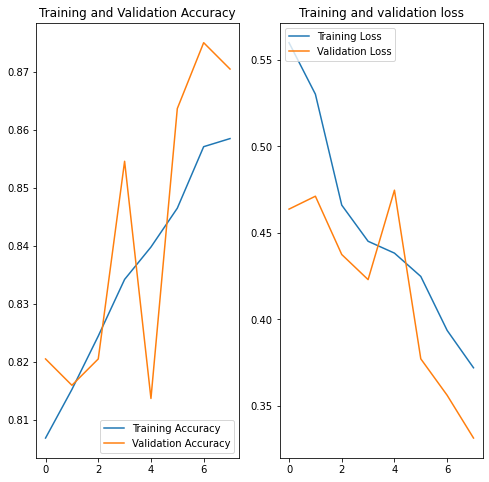

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.plot(range(EPOCHS),val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and validation loss')
plt.show()

# Actual vs Predict

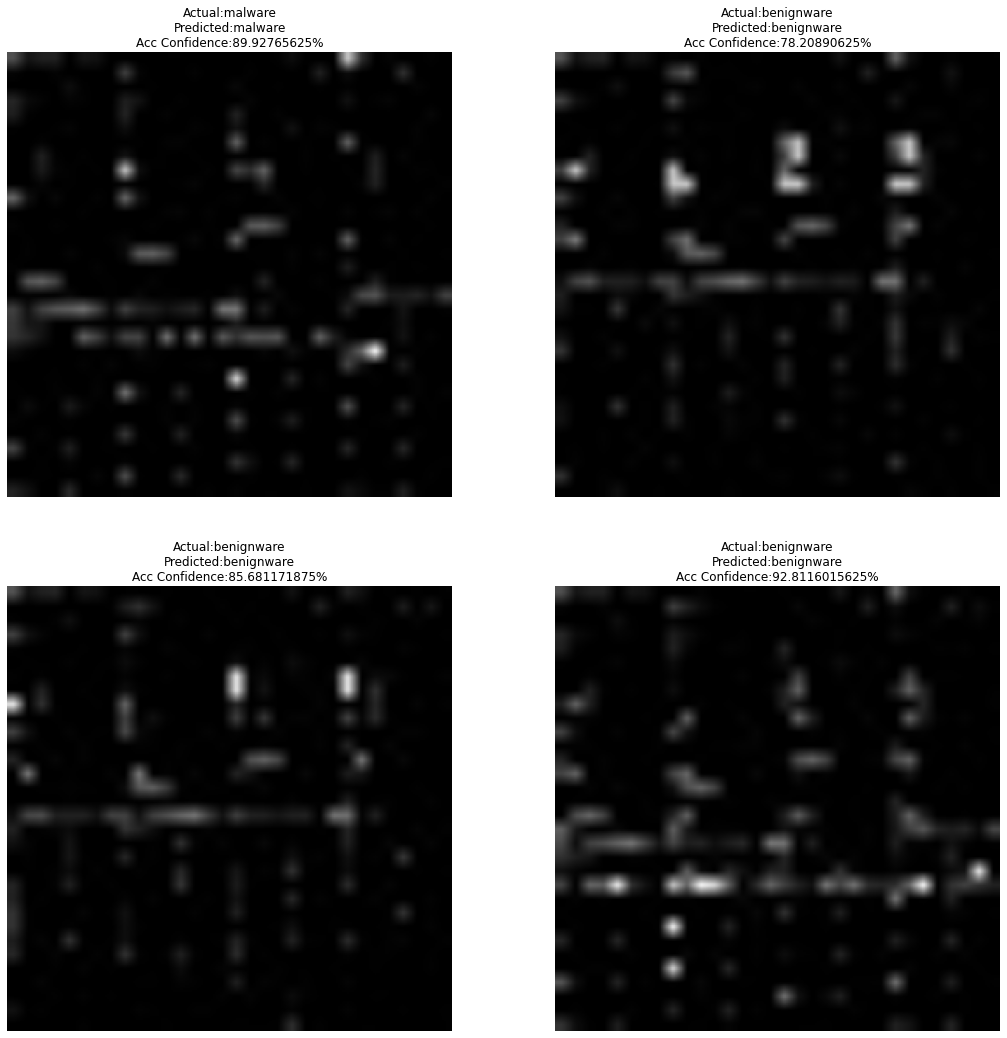

In [33]:
import numpy as np
for image_batch,labels_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  #plt.imshow(first_image)
  
  plt.figure(figsize=(18,18))
  for i in range(4):
    plt.subplot(2,2,i+1)
    prediction_value = CNNmodel.predict(image_batch)
    prediction_value_name=class_names[np.argmax(prediction_value[i])]
    actual_value_name = class_names[labels_batch[i].numpy()]
    confidence = (round(100*(np.max(image_batch[i])),2)/256)
    confidence_str = str(confidence)
   # print(confidence_str)
   # print("First image to predict")
   # print("Actual value:::"+actual_value_name)
   # print("Prediction value::"+prediction_value_name)
    first_image = image_batch[i].numpy().astype('uint8')
    plt.imshow(first_image)
    plt.title("Actual:"+(actual_value_name)+"\nPredicted:"+(prediction_value_name)+"\nAcc Confidence:"+(confidence_str)+"%")
    #plt.title()
    plt.axis("off")
 